In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/B7/Master.csv')
df

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0      aardsda01     1981.0        12.0      27.0          USA         CO   
1      aaronha01     1934.0         2.0       5.0          USA         AL   
2      aaronto01     1939.0         8.0       5.0          USA         AL   
3       aasedo01     1954.0         9.0       8.0          USA         CA   
4       abadan01     1972.0         8.0      25.0          USA         FL   
...          ...        ...         ...       ...          ...        ...   
18841   zupofr01     1939.0         8.0      29.0          USA         CA   
18842  zuvelpa01     1958.0        10.0      31.0          USA         CA   
18843  zuverge01     1924.0         8.0      20.0          USA         MI   
18844  zwilldu01     1888.0        11.0       2.0          USA         MO   
18845   zychto01     1990.0         8.0       7.0          USA         IL   

           birthCity  deathYear  deathMonth  deathDay  ...  nameLast  \
0             Denver        NaN         NaN       NaN  ...   Aardsma   
1             Mobile        NaN         NaN       NaN  ...     Aaron   
2             Mobile     1984.0         8.0      16.0  ...     Aaron   
3             Orange        NaN         NaN       NaN  ...      Aase   
4         Palm Beach        NaN         NaN       NaN  ...      Abad   
...              ...        ...         ...       ...  ...       ...   
18841  San Francisco     2005.0         3.0      25.0  ...      Zupo   
18842      San Mateo        NaN         NaN       NaN  ...   Zuvella   
18843        Holland     2014.0         9.0       8.0  ...  Zuverink   
18844      St. Louis     1978.0         3.0      27.0  ...  Zwilling   
18845          Monee        NaN         NaN       NaN  ...      Zych   

             nameGiven weight height bats throws       debut   finalGame  \
0          David Allan  220.0   75.0    R      R  2004-04-06  2015-08-23   
1          Henry Louis  180.0   72.0    R      R  1954-04-13  1976-10-03   
2           Tommie Lee  190.0   75.0    R      R  1962-04-10  1971-09-26   
3       Donald William  190.0   75.0    R      R  1977-07-26  1990-10-03   
4        Fausto Andres  184.0   73.0    L      L  2001-09-10  2006-04-13   
...                ...    ...    ...  ...    ...         ...         ...   
18841     Frank Joseph  182.0   71.0    L      R  1957-07-01  1961-05-09   
18842             Paul  173.0   72.0    R      R  1982-09-04  1991-05-02   
18843           George  195.0   76.0    R      R  1951-04-21  1959-06-15   
18844  Edward Harrison  160.0   66.0    L      L  1910-08-14  1916-07-12   
18845    Anthony Aaron  190.0   75.0    R      R  2015-09-04  2015-10-03   

        retroID    bbrefID  
0      aardd001  aardsda01  
1      aaroh101  aaronha01  
2      aarot101  aaronto01  
3      aased001   aasedo01  
4      abada001   abadan01  
...         ...        ...  
18841  zupof101   zupofr01  
18842  zuvep001  zuvelpa01  
18843  zuveg101  zuverge01  
18844  zwild101  zwilldu01  
18845  zycht001   zychto01  

[18846 rows x 24 columns]

In [3]:
hw = df[['weight', 'height']]
hw

weight  height
0       220.0    75.0
1       180.0    72.0
2       190.0    75.0
3       190.0    75.0
4       184.0    73.0
...       ...     ...
18841   182.0    71.0
18842   173.0    72.0
18843   195.0    76.0
18844   160.0    66.0
18845   190.0    75.0

[18846 rows x 2 columns]

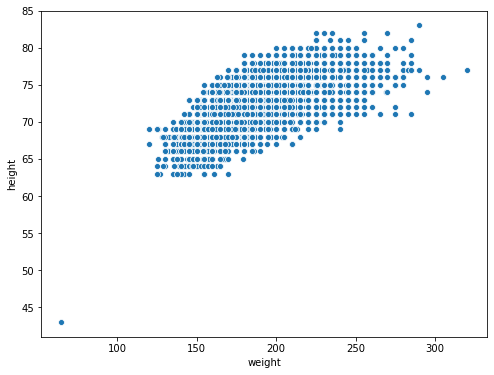

In [4]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=hw, x='weight', y='height');

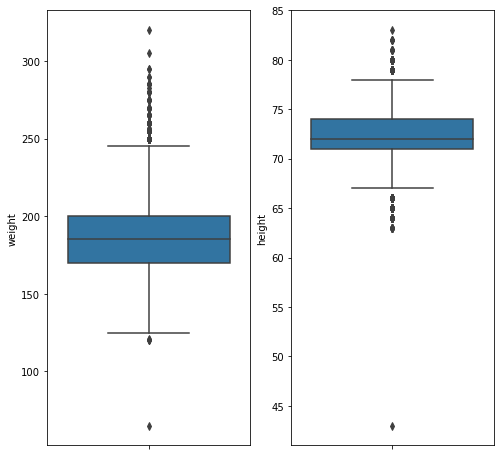

In [5]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sb.boxplot(data=hw, y='weight')
plt.subplot(1,2,2)
sb.boxplot(data=hw, y='height')
plt.show()

In [36]:
hw.dropna(inplace=True)
n = 2.5
z_height = stats.zscore(hw['height'])
hw_no_outlier_height = hw.iloc[np.where((z_height > -n) & (z_height < n))[0]]
z_weight = stats.zscore(hw_no_outlier_height['weight'])
hw_no_outlier = hw_no_outlier_height.iloc[np.where((z_weight > -n) & (z_weight < n))[0]]

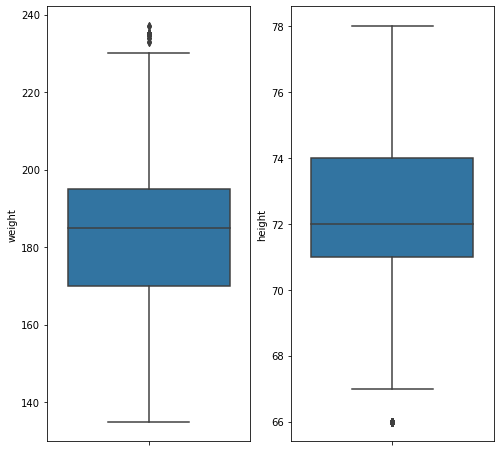

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sb.boxplot(data=hw_no_outlier, y='weight')
plt.subplot(1,2,2)
sb.boxplot(data=hw_no_outlier, y='height')
plt.show()

In [39]:
stats.pearsonr(hw_no_outlier.weight, hw_no_outlier.height)

(0.6761338860588884, 0.0)

In [40]:
stats.spearmanr(hw_no_outlier.weight, hw_no_outlier.height)

SpearmanrResult(correlation=0.6785100321752253, pvalue=0.0)

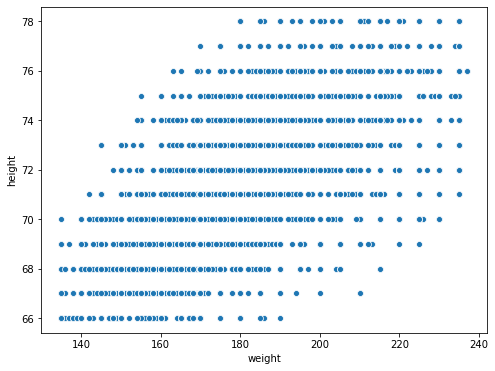

In [41]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=hw_no_outlier, x='weight', y='height');